In [1]:
#TODO: add text and explanation to this notebook

In [2]:
import IPython

%matplotlib inline
import matplotlib.pyplot as plt
import torchaudio
import torch

import os,sys,inspect
sys.path.insert(0, "..")

from src.data import librispeech
from src.dataprocessing import transforms as T
from src.utils import hparams

pre_path = '../../'

In [3]:
path = "MelNet-SpeechGeneration/models/params/dummymodel_librispeech.yml"
hp = hparams.HParams.from_yaml(pre_path+path)

In [4]:
librispeech = librispeech.download_data(root=pre_path+hp.data.path, url=hp.data.url)
dataloader_librispeech = torch.utils.data.DataLoader(librispeech)
dataiter = iter(dataloader_librispeech)

In [5]:
waveform1, sample_rate1, utterance1, speaker_id1, chapter_id1, utterance_id1 = dataiter.next()
waveform2, sample_rate2, utterance2, speaker_id2, chapter_id2, utterance_id2 = dataiter.next()

## Wave to Spectrogram and Spectrogram to Wave

In [6]:
#TODO: try with a batch of 2

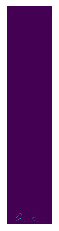

In [7]:
# Preparation and Transformation
spectrogram = T.wave_to_spectrogram(waveform1, hp)
T.plot_spectrogram(spectrogram, hp)

Waveform 0, shape: torch.Size([1, 40640])
Waveform 0, Sample rate: 16000


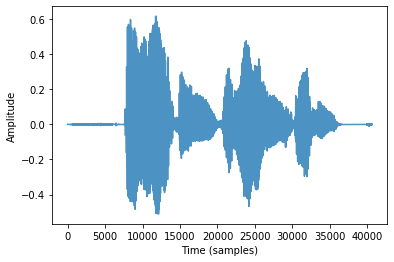

In [8]:
# Original
T.plot_wave(waveform1, hp)

Waveform 0, shape: torch.Size([1, 40448])
Waveform 0, Sample rate: 16000


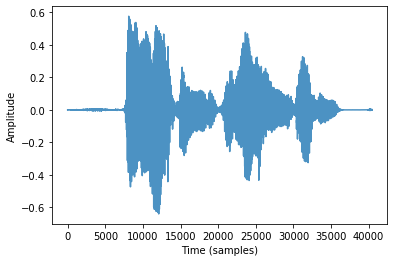

In [9]:
# Reconstructed
wave_rec = T.spectrogram_to_wave(spectrogram, hp, n_iter=32)
T.plot_wave(wave_rec, hp)

In [10]:
# difference between waves
print(waveform1.flatten().shape, wave_rec.flatten().shape)
print(torch.sum(torch.abs(wave_rec-waveform1.flatten()[:40448])))
print(torch.sum(torch.abs(wave_rec-waveform1.flatten()[:40448]))/torch.sum(torch.abs(waveform1.flatten()[:40448])))

torch.Size([40640]) torch.Size([40448])
tensor(3202.5977)
tensor(1.2306)


In [13]:
print("Original:")
IPython.display.Audio(data=waveform1.flatten().numpy(), rate=hp.audio.sample_rate)

Original:


In [14]:
print("Reconstructed:")
IPython.display.Audio(data=wave_rec.flatten().numpy(), rate=hp.audio.sample_rate)

Reconstructed:


In [15]:
print("Wave:        ", waveform1.shape, " Shape: [B, 1, L]")
print("Spectrogram: ", spectrogram.shape, " Shape: [B, FREQ, FRAMES]")
print("Wave_rec:    ", wave_rec.shape, " Shape: [B, 1, L']")

Wave:         torch.Size([1, 1, 40640])  Shape: [B, 1, L]
Spectrogram:  torch.Size([1, 769, 159])  Shape: [B, FREQ, FRAMES]
Wave_rec:     torch.Size([1, 1, 40448])  Shape: [B, 1, L']


## Spectrogram to Spectrogram dB and Spectrogram dB to Spectrogram

In [16]:
# Preparation
spectrogram = T.wave_to_spectrogram(waveform1, hp)

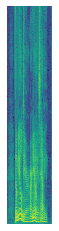

In [17]:
# Transformation
spectrogram_db = T.amplitude_to_db(spectrogram, hp)
T.plot_spectrogram(spectrogram_db, hp)

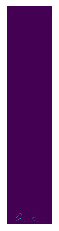

In [18]:
# Original
T.plot_spectrogram(spectrogram, hp)

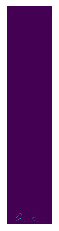

In [19]:
# Reconstructed
spectrogram_rec_from_db = T.db_to_amplitude(spectrogram_db, hp)
T.plot_spectrogram(spectrogram_rec_from_db, hp)

In [20]:
# difference between spectrograms
print(torch.sum(torch.abs(spectrogram_rec_from_db-spectrogram)))
print(torch.sum(torch.abs(spectrogram_rec_from_db-spectrogram))/torch.sum(torch.abs(spectrogram)))

tensor(0.2094)
tensor(2.2273e-07)


In [21]:
print("Spectrogram:             ", spectrogram.shape, " Shape: [B, FREQ, FRAMES]")
print("Spectrogram_db:          ", spectrogram_db.shape, " Shape: [B, FREQ, FRAMES]")
print("Spectrogram_rec_from_db: ", spectrogram_rec_from_db.shape, " Shape: [B, FREQ, FRAMES]")

Spectrogram:              torch.Size([1, 769, 159])  Shape: [B, FREQ, FRAMES]
Spectrogram_db:           torch.Size([1, 769, 159])  Shape: [B, FREQ, FRAMES]
Spectrogram_rec_from_db:  torch.Size([1, 769, 159])  Shape: [B, FREQ, FRAMES]


## Spectrogram to MelSpectrogram and MelSpectrogram to Spectrogram

In [22]:
# Preparation
spectrogram = T.wave_to_spectrogram(waveform1, hp)

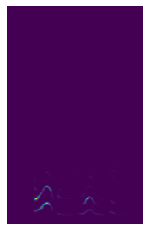

In [23]:
# Transformation
melspectrogram = T.spectrogram_to_melspectrogram(spectrogram, hp)
T.plot_melspectrogram(melspectrogram, hp)

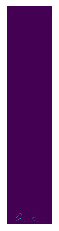

In [24]:
# Original
T.plot_spectrogram(spectrogram, hp)

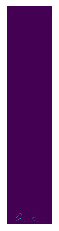

In [25]:
# Reconstructed
spectrogram_rec_from_mel = T.melspectrogram_to_spectrogram(melspectrogram, hp)
T.plot_spectrogram(spectrogram_rec_from_mel, hp)

In [26]:
# difference between spectrograms
print(torch.sum(torch.abs(spectrogram_rec_from_mel-spectrogram)))
print(torch.sum(torch.abs(spectrogram_rec_from_mel-spectrogram))/torch.sum(torch.abs(spectrogram)))

tensor(8200.7285)
tensor(0.0087)


In [27]:
print("Spectrogram:              ", spectrogram.shape, " Shape: [B, FREQ, FRAMES]")
print("Melspectrogram:           ", melspectrogram.shape, " Shape: [B, N_MELS, FRAMES]")
print("Spectrogram_rec_from_mel: ", spectrogram_rec_from_mel.shape, " Shape: [B, FREQ, FRAMES]")

Spectrogram:               torch.Size([1, 769, 159])  Shape: [B, FREQ, FRAMES]
Melspectrogram:            torch.Size([1, 256, 159])  Shape: [B, N_MELS, FRAMES]
Spectrogram_rec_from_mel:  torch.Size([1, 769, 159])  Shape: [B, FREQ, FRAMES]


## MelSpectrogram to MelSpectrogram dB and MelSpectrogram dB to MelSpectrogram

In [28]:
# Preparation
melspectrogram = T.wave_to_melspectrogram(waveform1, hp)

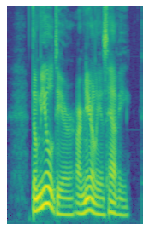

In [29]:
# Transformation
melspectrogram_db = T.amplitude_to_db(melspectrogram, hp)
T.plot_melspectrogram(melspectrogram_db, hp)

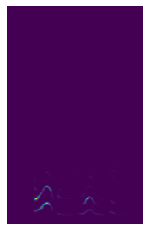

In [30]:
# Original
T.plot_melspectrogram(melspectrogram, hp)

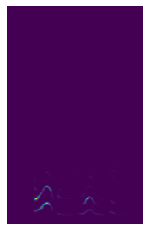

In [31]:
# reconstructed
melspectrogram_rec_from_db = T.db_to_amplitude(melspectrogram_db, hp)
T.plot_melspectrogram(melspectrogram_rec_from_db, hp)

In [32]:
# difference between spectrograms
print(torch.sum(torch.abs(melspectrogram_rec_from_db-melspectrogram)))
print(torch.sum(torch.abs(melspectrogram_rec_from_db-melspectrogram))/torch.sum(torch.abs(melspectrogram)))

tensor(0.2382)
tensor(2.5332e-07)


In [33]:
print("Melspectrogram:             ", melspectrogram.shape, " Shape: [B, N_MELS, FREQ]")
print("Melspectrogram_db:          ", melspectrogram_db.shape, " Shape: [B, N_MELS, FREQ]")
print("Melspectrogram_rec_from_db: ", melspectrogram_rec_from_db.shape, " Shape: [B, N_MELS, FREQ]")

Melspectrogram:              torch.Size([1, 256, 159])  Shape: [B, N_MELS, FREQ]
Melspectrogram_db:           torch.Size([1, 256, 159])  Shape: [B, N_MELS, FREQ]
Melspectrogram_rec_from_db:  torch.Size([1, 256, 159])  Shape: [B, N_MELS, FREQ]


## Extra: impact of applying amplitude_to_db conversion before MelScale

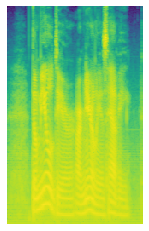

In [34]:
import torchaudio
# waveform -> linear spectrogram -> amplitude to db -> mel spectrogram
spectrogram = T.wave_to_spectrogram(waveform1, hp)
spectrogram_db = T.amplitude_to_db(spectrogram, hp)
melspectrogram = T.spectrogram_to_melspectrogram(spectrogram_db, hp)
T.plot_melspectrogram(melspectrogram, hp)

## Complete Pipeline:
Wave - Spectrogram - MelSpectrogram - MelSpectrogram dB - MelSpectrogram - Wave 

In [35]:
wave_orig = waveform1
spectrogram_orig = T.wave_to_spectrogram(wave_orig, hp)
melspectrogram_orig = T.spectrogram_to_melspectrogram(spectrogram_orig, hp)
melspectrogram_db_orig = T.amplitude_to_db(melspectrogram_orig, hp)
melspectrogram_rec = T.db_to_amplitude(melspectrogram_db_orig, hp)
spectrogram_rec = T.melspectrogram_to_spectrogram(melspectrogram_rec, hp)
wave_rec = T.spectrogram_to_wave(spectrogram_rec, hp, n_iter=1000)

In [36]:
# difference between waves
print(wave_orig.shape, wave_rec.shape)
print(torch.sum(torch.abs(wave_rec.flatten()-wave_orig.flatten()[:wave_rec.size(2)])))
print(torch.sum(torch.abs(wave_rec.flatten()-wave_orig.flatten()[:wave_rec.size(2)]))/torch.sum(torch.abs(wave_orig.flatten()[:wave_rec.size(2)])))

torch.Size([1, 1, 40640]) torch.Size([1, 1, 40448])
tensor(4571.7646)
tensor(1.7568)


Waveform 0, shape: torch.Size([1, 40640])
Waveform 0, Sample rate: 16000


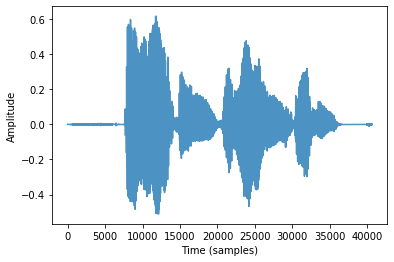

In [37]:
# Original
T.plot_wave(waveform1, hp)

Waveform 0, shape: torch.Size([1, 40448])
Waveform 0, Sample rate: 16000


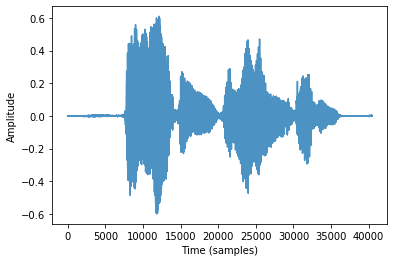

In [38]:
T.plot_wave(wave_rec, hp)

In [39]:
print("Original:")
IPython.display.Audio(data=wave_orig.flatten().numpy(), rate=hp.audio.sample_rate)

Original:


In [40]:
print("Reconstructed:")
IPython.display.Audio(data=wave_rec.flatten().numpy(), rate=hp.audio.sample_rate)

Reconstructed:
